In [62]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "johnsmith88/heart-disease-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
df.tail()

/tmp/ipython-input-3236694438.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 37.2k/37.2k [00:00<00:00, 27.3MB/s]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [63]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Here we will split the data and define the sigmoid function and then normalize the features

# Sigmoid Function
def sigmoid(z):
  z = np.asarray(z, dtype=float)
  return 1 / (1 + np.exp(-z))

# Dropping the target column and reassigning it to y
X = df.drop('target', axis=1)
y = df['target']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [64]:
# Here we initialize the w and b for the logistic regression formula
w = np.zeros(X_test.shape[1])
b = 0
# Applying the sigmoid function
z = np.dot(X_train, w) + b
# Predicion our model made
yhat = sigmoid(z)

In [67]:
# Reshaping the y_train after the split
y_tr = y_train.to_numpy().reshape(-1)
error = 0.0
for i in range(X_train.shape[0]):
  loss_i = y_tr[i] * np.log(yhat[i]) + (1 - y_tr[i]) * np.log(1 - yhat[i])
  error += loss_i

error = -error / len(y_train)
print(error)

0.6931471805599414


In [66]:
# Computing the variables needed for Gradient Descent
e =  yhat - y_train
m, n = X_train.shape
dw = 1/m*(X_train.T @ e)
db = 1/m * np.sum(e)
alpha = 0.001
w = w - alpha * dw
b = b - alpha * db

In [68]:
# This is main loss computation loop. We use 1000 epochs and we can adjust if needed
for epoch in range(1000):
  z = np.dot(X_train, w) + b
  yhat = sigmoid(z)
  e =  yhat - y_train
  dw = 1/m*(X_train.T @ e)
  db = 1/m * np.sum(e)
  alpha = 0.01
  w = w - alpha * dw
  b = b - alpha * db
  loss = -np.mean(y_train*np.log(yhat) + (1 - y_train)*np.log(1 - yhat))
  if epoch % 100 == 0:
    print(f"Epoch: {epoch}, Error: {loss}")

Epoch: 0, Error: 0.6928101242749424
Epoch: 100, Error: 0.5003330849538361
Epoch: 200, Error: 0.432519365274142
Epoch: 300, Error: 0.40022650216401734
Epoch: 400, Error: 0.38176521689375703
Epoch: 500, Error: 0.3699617272544377
Epoch: 600, Error: 0.3618362694522755
Epoch: 700, Error: 0.35594458184247363
Epoch: 800, Error: 0.35150588536885397
Epoch: 900, Error: 0.34806255770151867


In [69]:
# Accuracy, Precision and Recall calculation
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

proba = sigmoid(X_test @ w + b)
pred  = (proba >= 0.9).astype(int)

print("Accuracy:", accuracy_score(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, proba))
print(classification_report(y_test, pred))


Accuracy: 0.6585365853658537
ROC AUC: 0.8858747382448124
              precision    recall  f1-score   support

           0       0.59      0.99      0.74       102
           1       0.97      0.33      0.49       103

    accuracy                           0.66       205
   macro avg       0.78      0.66      0.62       205
weighted avg       0.78      0.66      0.62       205



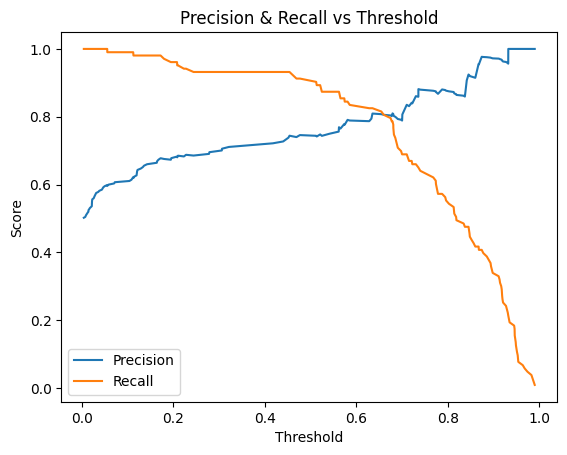

In [70]:
# Precision & Recall vs Threshold plot
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

proba = sigmoid(X_test @ w + b)
prec, rec, thresh = precision_recall_curve(y_test, proba)

plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.show()

In [71]:
# We'll also use Decision trees now
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth = None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

y_proba = rf.predict_proba(X_test)[:,1]
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Random Forest Accuracy: 0.9853658536585366
ROC AUC: 1.0


In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5, scoring="roc_auc")
print(scores, scores.mean())


[1.         1.         1.         1.         0.99885649] 0.9997712978845055


In [73]:
import pandas as pd
import numpy as np

feature_names = list(X.columns)

new_patient = {
    "age": 54, "sex": 1, "cp": 0, "trestbps": 130, "chol": 246, "fbs": 0,
    "restecg": 0, "thalach": 150, "exang": 0, "oldpeak": 1.2, "slope": 2,
    "ca": 0, "thal": 2
}

x_new = pd.DataFrame([new_patient], columns=feature_names)

x_new_scaled = scaler.transform(x_new)

def sigmoid(z): return 1.0 / (1.0 + np.exp(-z))
proba = sigmoid(x_new_scaled @ w + b)
p = float(proba[0])


threshold = 0.5
pred = int(p >= threshold)

print(f"Predicted probability of disease: {p:.3f}")
print(f"Predicted class (threshold={threshold}): {pred}")

if pred == 1:
  print("You have heart disease")
else:
  print("You do not have heart disease")

Predicted probability of disease: 0.573
Predicted class (threshold=0.5): 1
You have heart disease


In [77]:
# If your tree was trained on RAW X_train:
y_proba = rf.predict_proba(x_new)[:, 1]
p = float(y_proba[0])
pred = int(p >= threshold)


[0.41]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [85]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000,
                            solver="lbfgs",
                            random_state=42)
log_reg.fit(X_train, y_train)
y_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)
y_pred_custom = (y_proba >= 0.3).astype(int)
new_patient_df = pd.DataFrame([new_patient], columns=X.columns)
new_patient_scaled = scaler.transform(new_patient_df)

p = log_reg.predict_proba(new_patient_scaled)[:, 1][0]
pred = int(p >= 0.5)

print(f"Probability of disease: {p:.3f}")
print(f"Predicted class: {pred}")

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


Probability of disease: 0.501
Predicted class: 1
Accuracy: 0.7804878048780488
ROC AUC: 0.8839710641538169
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205

